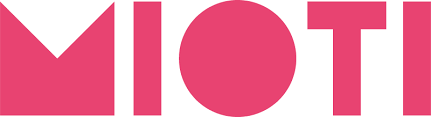

<center style="color:#888">Módulo Advanced Data Science<br/>Reinforcement Learning</center>


# S5. Challenge. Aplicando lo aprendido

## Vamos a programar nuestro primer entorno y su agente
En este dummy example, tenemos las dos entidades que definen el aprendizaje por refuerzo:

**Agente**: Un ente que tiene un rol activo dentro de un entorno. En la práctica es una pieza de código que implementa una **política**. Básicamente esta política debe decidir qué acción es necesaria en cada paso, dada una serie de observaciones.    
**Entorno**: Un modelo del mundo, externo al agente, que se encarga de proveer a éste con observaciones y recompensas.

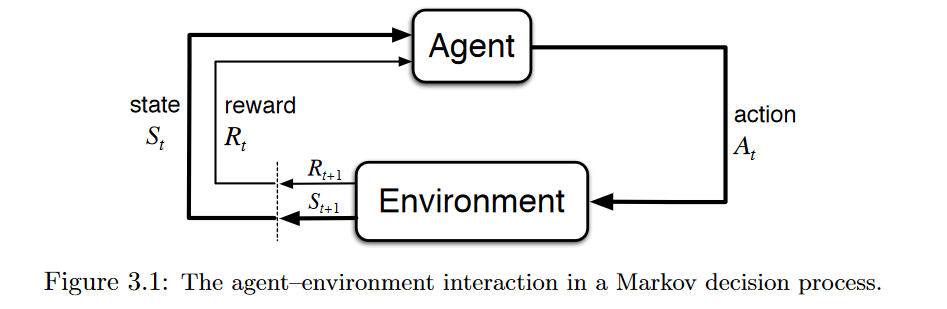

In [1]:
import random

# Creamos la clase Entorno
class Environment:
    def __init__(self, steps):
        
        # Dentro del constructor inicializamos el número máximo de pasos
        self.steps_left = steps
        
    def get_observations(self):
        
        # En este caso de juguete las observaciones son inútiles pero necesarias para entender el concepto.
        return [0.0, 0.0, 0.0]
    
    def get_actions(self):
        
        # Las acciones ficticias que el agente puede tomar ("action space"), son dos: 1 ó 0
        return [0, 1]
    
    def is_done(self): # def close(self):
        
        # Determina si el episodio ha terminado cuando no quedan pasos por ejecutar.
        return self.steps_left == 0
    
    def action(self, action): #def step(self, action)
        
        # Toma una acción del agente y devuelve una recompensa aleatoria [0, 1)
        if self.is_done():
            raise Exception("Game is over")
        self.steps_left -= 1
        return random.random()   


In [2]:
# Creamos la clase agente
class Agent:
    def __init__(self):
        
        # Inicializarmos el contador de recompensas
        self.total_reward = 0.0
        
    def step(self, env):
        
        # El agente ejecuta un paso en el entorno: 
        # Observa el entorno
        current_obs = env.get_observations()
        # Recibe el action space
        actions = env.get_actions()
        # Elige aleatoriamente una acción dentro de ese action space
        selected_action = random.choice(actions)
        # Ejecuta la acción elegida y recibe una recompensa por ello
        reward = env.action(selected_action)
        # Suma la recompensa al contador
        self.total_reward += reward

### Ejercicio 1
Fijate que tienes que rellenar dos líneas de código en la celda inferior

In [4]:
# Aquí es donde se desarrolla el "baile" del RL
# Creamos un entorno con 10 pasos como límite
env = Environment(10)## YOUR CODE HERE ##

# Creamos un agente
agent = Agent() ## YOUR CODE HERE ##

# El agente ejecuta acciones en el entorno hasta agotar su límite
while not env.is_done():
    agent.step(env)
    
# Imprimimos por pantalla la recompensa acumulada del agente
print("Recompensa total de: %.4f" %agent.total_reward)

Recompensa total de: 4.8823


## Integrando el entorno en Gym

Ahora vamos a ver como integrar un entorno personalizado en la librería Gym. Para ello, necesitas crear la siguiente estructura de directorios:     

    gym-example/     
        README.md     
        setup.py          
        gym_example/    
            __init__.py
            envs/
              __init__.py
              example_env.py
              
* README.md : 

        Culquier texto explicativo
              
* gym-example/setup.py :

        from setuptools import setup

        setup(name='gym_example',
              version='0.0.1',
              install_requires=['gym'])  # And any other dependencies 'Example' needs)    
              
* gym-example/gym_example/__init__.py :

        from gym.envs.registration import register

        register(
            id='example-v0',
            entry_point='gym_example.envs:ExampleEnv',
        )
        
        
* gym-example/gym_example/envs/__init__.py :    

        from gym_example.envs.foo_env import FooEnv    
        
* gym-example/gym_example/envs/example_env.py :




      

    import numpy as np
    import gym
    import random


    class ExampleEnv(gym.Env): 
        metadata = {'render.modes': ['human']}

        def __init__(self):
            # There are two actions, first will get reward of 1, second reward of -1. 
            self.action_space = gym.spaces.Discrete(5)
            self.observation_space = gym.spaces.Discrete(2)

        def step(self, action):

            # if we took an action, we were in state 1
            state = 1

            reward = np.random.normal(loc = action, scale = action)

            # regardless of the action, game is done after a single step
            done = True

            info = {}

            return state, reward, done, info

        def reset(self):
            state = 0
            return state

        def render(self, mode='human'):
            pass

        def close(self):
            pass
            
Para este ejemplo no nos vamos a detener en los métodos render() y close(), puedes echar un vistazo a [este](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py) ejemplo sencillo del entorno FrozenLake que ya conoces o a [este otro](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) algo más complejo del entorno CartPole. Como puedes observar todos los entornos tienen una estructura muy similar.

### Ejercicio 2
Localiza en que directorio te encuentras, dentro de él crea la carpeta gym-example y desarrolla la estructura propuesta anteriormente.

In [5]:
%pwd

'C:\\Users\\JPAS\\Cursos\\MIOTI_Master_en_Data_Sciencie\\Advance\\RL\\SESION_5_Multi_Armed_Bandits_Rewards\\challenge'

Entra dentro del directorio gym-example e instalalo como un paquete de pip

In [6]:
%cd gym-example

C:\Users\JPAS\Cursos\MIOTI_Master_en_Data_Sciencie\Advance\RL\SESION_5_Multi_Armed_Bandits_Rewards\challenge\gym-example


In [7]:
!pip install -e .

Obtaining file:///C:/Users/JPAS/Cursos/MIOTI_Master_en_Data_Sciencie/Advance/RL/SESION_5_Multi_Armed_Bandits_Rewards/challenge/gym-example
  Attempting uninstall: gym-example
    Found existing installation: gym-example 0.0.1
    Uninstalling gym-example-0.0.1:
      Successfully uninstalled gym-example-0.0.1
  Running setup.py develop for gym-example


Si al instanciar el entorno tenemos un error de que no lo encuentra, descomenta la liena 4 de la celda inferior.

In [11]:

import gym
import numpy as np
import random
import gym_example


Vamos a instanciar el entorno dummy que acabamos de crear. Lo resolveremos aplicando un simple algoritmo Q-Learning

In [13]:
env = gym.make("gym_example:example-v0") 

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

print(q_table)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [14]:
num_episodes = 10000
max_steps_per_episode = 1 # but it won't go higher than 1

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01

exploration_decay_rate = 0.01 #if we decrease it, will learn slower

In [15]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        # Exploration -exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state,:]))
            
        state = new_state
        rewards_current_episode += reward
        
        if done == True: 
            break
            
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
# Calculate and print the average reward per 10 episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
count = 100
print("********** Average  reward per episodes **********\n")

for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r / 100)))
    count += 100
    
# Print updated Q-table
print("\n\n********** Q-table **********\n")
print(q_table)

********** Average  reward per episodes **********

100 :  2.6701408476539674
200 :  3.2116912896583045
300 :  3.673953537300662
400 :  3.7742036678461752
500 :  3.080147529408425
600 :  4.083550122975152
700 :  2.623178619419441
800 :  3.4483960830428475
900 :  3.211369297739313
1000 :  3.9625559222608135
1100 :  3.8606189761152554
1200 :  2.7514476601215296
1300 :  2.8350663609058757
1400 :  2.7956788655210723
1500 :  2.843927263489354
1600 :  2.831502557271351
1700 :  2.2145952363551853
1800 :  3.354321329700946
1900 :  4.106424081565844
2000 :  4.258846805975232
2100 :  3.8964728872797845
2200 :  3.8436410977329554
2300 :  3.8529602028039878
2400 :  4.113368925974579
2500 :  4.579801646563283
2600 :  3.7499888081220383
2700 :  3.128871896904287
2800 :  3.382734078696404
2900 :  3.911530044196223
3000 :  4.268804397966365
3100 :  3.7955935209508356
3200 :  3.088849993960373
3300 :  2.4259434919895746
3400 :  2.683076970990292
3500 :  3.6171787607701393
3600 :  3.333117561319323
3700

# Tu turno     

Ahora que ya sabes como crear un entorno, te toca a ti! Es momento de usar la imaginación, el objetivo es crear un entorno para poder resolver un problema aplicando RL.    

Vamos a crear un entorno gráfico con al librería **Turtle** de python. A continuación tienes un ejemplo sencillo para que entiendas como funciona esta librería y en este [enlace](https://docs.python.org/3/library/turtle.html) puedes consultar la documentación para que veas las posibilidades que te ofrece


# Turtle

Un entorno interactúa con el agente enviando su estado y una recompensa. Por lo tanto, los siguientes son los pasos para crear un entorno, son:
* Crea una simulación.
* Agrega un vector de estado que represente el estado interno de la simulación.
* Agrega un sistema de recompensas a la simulación.    

Una vez que completemos el juego, podemos agregar el vector de estado y el sistema de recompensas en él. Y eso es todo, tenemos nuestro primer entorno de aprendizaje reforzado.    
Este juego será un simple juego de paleta y pelota. Donde tenemos una paleta en el suelo y la paleta necesita golpear la bola en movimiento. Si la pelota toca el suelo en lugar de la paleta, es un error.
Vamos a usar el módulo de **Turtle** incorporado en Python. Turtle proporciona una interfaz fácil y sencilla para construir y mover diferentes formas. La mayor parte del código se explica por sí mismo, por lo que solo le daré una breve descripción del código.


1. Background: Ventana vacía de tamaño (600, 600) píxeles. La coordenada del punto medio de la ventana es (0, 0). Significa que podemos ir de arriba a abajo y de izquierda a derecha en 300 píxeles.
2. Agreguemos una paleta en la parte inferior y una pelota en el centro.
3. Definimos 2 funciones para mover la paleta hacia la izquierda y hacia la derecha. Luego vinculamos estas funciones con las teclas izquierda y derecha. Significa que al presionar la tecla de flecha derecha, se llama a la función paddle_right y la paleta se mueve hacia la derecha 20 píxeles.
4. Definimos el movimiento de la pelota, se establece la velocidad horizontal en 3 y la velocidad vertical en -3. Significa que la bola se mueve 3 píxeles horizontalmente y -3 píxeles verticalmente después de cada cuadro. Entonces, para cada cuadro, tenemos que actualizar la posición de la bola en nuestro bucle principal usando su velocidad. Para que la pelota choque con las paredes laterales, ponemos las siguientes comprobaciones de límites en el código:     
* La bola debe chocar con las bolas superiores y laterales.
* La pelota debe chocar con la paleta.
* Si la pelota toca el suelo, el juego debe comenzar de nuevo desde el principio.     
5. Insertamos el marcador, definimos 2 variables 'Hit' (acertar) y 'Missed' (fallar). Si la pelota golpea la paleta, incrementamos el golpe, de lo contrario fallamos. Luego, podemos crear una tarjeta de puntuación que imprima la puntuación en la parte superior central de la pantalla.    

Ya solo queda es agregar un vector de estado y el sistema de recompensa a esta simulación.    

**Vector de estado y sistema de recompensas**    

Alimentamos con el vector de estado a nuestro agente de IA y el agente elige una acción basada en ese estado. El vector de estado debe contener información relevante. La bondad de la acción realizada por un agente depende de como sea de informativo sea el vector de estado.     

Se crea un vector de estado que contiene la siguiente información.     
* Posición de la paleta en el eje x
* Posición de la bola en los ejes x e y
* La velocidad de la pelota en los ejes x e y     

A continuación se muestra el sistema de recompensas que se ha implementado.     
* Dar una recompensa de $???$ si la pelota toca la paleta
* Da una recompensa de $???$ si la pelota no golpea la paleta.
* Dar una recompensa de $???$ cada vez que se mueva la paleta, para que la paleta no se mueva innecesariamente.     

También tenemos que implementar un espacio de acción. El agente elegirá una de las acciones del espacio de acción y la enviará al entorno. A continuación se muestra el espacio de acciónes.    
* 0 - Mueve la paleta hacia la izquierda.
* 1 - No hacer nada.    
* 2 - Mueve la paleta hacia la derecha. 

El agente enviará uno de estos números al entorno y el entorno realizará la acción correspondiente a esos números.     
Todo esto está empaquetado dentro de la función **step**. Esta es la función donde el agente interactúa con el entorno. El agente llama a esta función indicándole la acción en el argumento. Esta función devuelve el vector de estado y la recompensa al agente. Hay una variable más que devuelve, si el episodio ha terminado. En nuestro caso, el episodio termina cuando la pelota toca el suelo y comienza el nuevo episodio. El código tendrá mucho más sentido cuando lo veas a continuación.

### Ejercicio 3
**Tarea 1:** : Estima los valores de las 3 recompensas (las $???$ del apartado anterior):     
* Recompensa cuando la pala golpea la pelota
* Recompensa cuando la pelota cae al suelo
* Recompensa negativa por cada movimiento que hace la pala (queremos el menor número de movimientos posibles).

**Respuesta:** Aunque hemos probado con diversos valores, además de la **recompensa +3 por golpeo -3 por caida al suelo y -0.1 por movimiento**. He encontrado otra, la que esta recogida en la última versión del código, que me parece optima **premiando un poco más el golpeo al que le asigno 6 la caida al suelo -5 y cada movimiento bien sea izquierda o derecha -0.2**


![Sexto entrenamiento](./images/juego_6_grafica.jpg?raw=true "Optional Title")

Ten en cuenta que si la recompensa negativa por cada movimiento es grande en proporción a la positiva, y en las primeras fases del entrenamiento, la pala no llega a tocar la pelota, es posible que el agente tienda a quedarse quieto. Si es el caso contrario, el agente aprenderá que tiene que dar a la pelota con la pala, pero no tendrá en cuenta la "penalización por movimiento", por lo que estará continuamente moviéndose, y quedará una curva de recompensas así, si una tendencia positiva clara :

* Caso a:

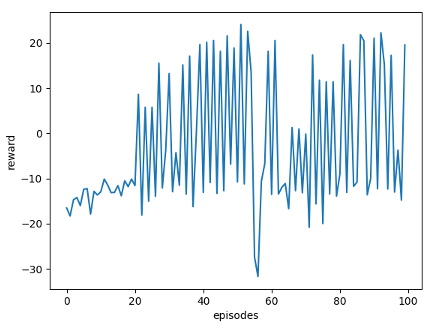     

Cuando queremos llegar a algo así:      

* Caso b:

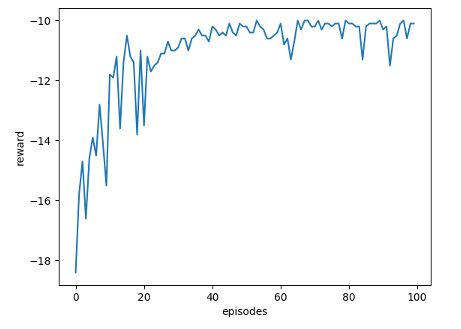      

o así:     

* Caso c:

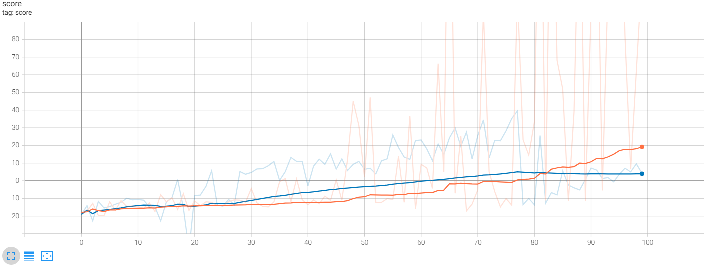

en estos dos casos (b y c) hay una tendencia positiva en el score o reward. En el caso de la gráfica *b* y *linea azul del c* la pelota siempre sale desde el mismo punto (x,y)=(0,100), mientras que en la *linea naranja del c* la coordenada X es aleatoria a lo ancho de todo el background.

Fijate en la gráfica *c* y contesta en una celda a las siguitentes preguntas:    

**¿Qué observas a nivel de recompensas (score)?**     
**¿Qué efecto crees que tiene introducir aleatoriedad en la posición de salida de la pelota en el eje de las X?¿Es positivo?¿Cómo lo explicas?**     

En las tres gráficas, a pesar de la tendencia alzista de las dos inferiores, se aprecia que el entrenamiento es relativamente inestable, esto es debido a la implementación "*sencilla*" o *adaptada* del DQN que se muestra para este entorno en el que solo se usa una red neuronal como verás más alante en el código.    

**¿Cómo crees que se podría estabilizar el entrenamiento?** (Tip: recuerda la solución que propuso DeepMind en su paper 'Playing Atari with Deep Reinforcement Learning' que vimos en clase, ¿Cuantas redes neuronales se usaban y por qué?)

Para esta tarea **adjunta la gráfica** de las recompensas (con la curva aplanada y sin aplanar) que se genera durante el entrenamiento una vez que hayas determinado las recompensas. Para esto, te recominedo que uses **Tensorboard** según se explica dos celdas más abajo.   

**Tip**: Si a partir de unas 25-30 partidas, el agente no ha conseguido dar 5-6 veces a la pelota con la pala, es posible que algo vaya mal. Puede ser por el "azar" y en este caso relanza en entrenamiento o por la disparidad es las recompensas según se ha explicado anteriormente.

**Respuestas:**

**¿Qué observas a nivel de recompensas?**
Que en la mayoría de los casos es negativa y si es positiva lo es por muy poco.
**¿Qué efecto crees que tiene introducir aleatoriedad en la posición de salida de la pelota en el eje de las X?¿Es positivo?¿Cómo lo explicas?**
Le añade una mejora, ya que le añade más variabilidad al inicio del juego, aunque evidentemente el aprendizaje y la convergencia serán más lentos que si fuera algo determinista y la bola siempre empezara en el punto medio (0,0). Entiendo que esto es positivo, debido a que le añade mayor variabilidad, habiendo partidas muy cortas y otras más largas, por lo que se añade esa inestabilidad o picos de sierra al entreno.

**Respuestas:**

**¿Cómo crees que se podría estabilizar el entrenamiento?**
Tal como hizo DeepMind, aplico el deep q network, aplicando 2 redes DNN (una local y otra target(objetivo) y sobre todo añadio un buffer donde se guardaban las experiencias, se anotaba (S, A, R, S´) que iba generando la red local antes del entrenamiento.

Una vez se generaba un buffer suficiente de experiencias y elegidas de forma aleatoria, se entrenaba la red local y la objetivo simultaneamente y se calculaba el error entre las prediciones de la objetivo y la local. Los pesos se iban recalculando en la local con back propagation. Cada X tiempo o epocas los pesos de la Objetivo se actualizan con los de la Local y se vuelven a congelar. Con esta tecnica de congelación actualización de pesos cada X tiempo, estabilizamos y facilitamos la convergencias de las dos redes y por lo tanto del entrenamiento.

In [2]:
import turtle as t



class Paddle():

    def __init__(self):

        self.done = False
        self.reward = 0
        self.hit, self.miss = 0, 0

        # Definimos el background del juego

        self.win = t.Screen() # Create a screen
        self.win.title('Paddle-MIOTI') # Set the title to paddle
        self.win.bgcolor('blue') # Set the color to black
        self.win.setup(width=800, height=800) # Set the width and height to 600
        self.win.tracer(0)   
                
        # Definimos la pala

        self.paddle = t.Turtle() #Create a turtle object
        self.paddle.speed(0) 
        self.paddle.shape('square') # Select a square shape
        self.paddle.shapesize(stretch_wid=1, stretch_len=5) # Streach the length of square by 5 
        self.paddle.color('green') # Set the color to white
        self.paddle.penup()
        self.paddle.goto(0, -275)  # Place the shape on bottom of the screen

        # Definimos la pelota

        self.ball = t.Turtle()  # Create a turtle object
        self.ball.speed(0)
        self.ball.shape('circle') # Select a circle shape
        self.ball.color('yellow') # Set the color to red
        self.ball.penup()
        self.ball.goto(0, 100) # Place the shape in middle 
        self.ball.dx = 3 #ball's x-axis velocity 
        self.ball.dy = -3 #ball's y-axis velocity 

        # Definimos el espacio donde aparecerá nuestro score

        self.score = t.Turtle() # Create a turtle object
        self.score.speed(0)
        self.score.color('white') # Set the color to white
        self.score.penup()
        self.score.hideturtle() # Hide the shape of the object
        self.score.goto(0, 250) # Set scorecard to upper middle of the screen
        self.score.write("Hit: {}   Missed: {}".format(self.hit, self.miss), align='center', font=('Courier', 24, 'bold'))

        # -------------------- Keyboard control ----------------------

        self.win.listen()
        self.win.onkey(self.paddle_right, 'Right')
        self.win.onkey(self.paddle_left, 'Left')

    # Definimos los movimientos de la pala

    def paddle_right(self):

        x = self.paddle.xcor() # Get the x position of paddle
        if x < 225:
            self.paddle.setx(x+20) # increment the x position by 20

    def paddle_left(self):

        x = self.paddle.xcor() # Get the x position of paddle
        if x > -225:
            self.paddle.setx(x-20) # decrement the x position by 20

    def run_frame(self):

        self.win.update()

        # Definimos el Movimiento de la pelota

        self.ball.setx(self.ball.xcor() + self.ball.dx) # update the ball's x-location using velocity
        self.ball.sety(self.ball.ycor() + self.ball.dy) # update the ball's y-location using velocity

        # Definimos la colisión contra la pared

        if self.ball.xcor() > 290: # If ball touch the right wall
            self.ball.setx(290)
            self.ball.dx *= -1# Reverse the x-axis velocity

        if self.ball.xcor() < -290: # If ball touch the left wall
            self.ball.setx(-290)
            self.ball.dx *= -1# Reverse the x-axis velocity

        if self.ball.ycor() > 290: # If ball touch the upper wall
            self.ball.sety(290)
            self.ball.dy *= -1# Reverse the y-axis velocity

        # Definimos cuando la pelota cae el suelo

        if self.ball.ycor() < -290: # If ball touch the ground
            self.ball.goto(0, 100) # Reset the ball position
            self.miss += 1
            self.score.clear()
            self.score.write("Hit: {}   Missed: {}".format(self.hit, self.miss), align='center', font=('Courier', 24, 'normal'))
            self.reward -= 5 #ESCRIBE AQUÍ TU RECOMPENSA #
            self.done = True

        # Cuando la pala golpea la pelota

        if abs(self.ball.ycor() + 250) < 2 and abs(self.paddle.xcor() - self.ball.xcor()) < 55:
            self.ball.dy *= -1
            self.hit += 1
            self.score.clear()
            self.score.write("Hit: {}   Missed: {}".format(self.hit, self.miss), align='center', font=('Courier', 24, 'normal'))
            self.reward += 6 #ESCRIBE AQUÍ TU RECOMPENSA #

    # ------------------------ AI control ------------------------

    # 0 move left
    # 1 do nothing
    # 2 move right

    def reset(self):

        self.paddle.goto(0, -275)
        self.ball.goto(random.randint(-300, 300), 100) # Con esto hacemos que la pelota salga de una posición aleatoria en el eje X. Si quieres ver diferencas, cambialo por self.ball.goto(0, 100) 
        return [self.paddle.xcor()*0.01, self.ball.xcor()*0.01, self.ball.ycor()*0.01, self.ball.dx, self.ball.dy]

    def step(self, action):

        self.reward = 0
        self.done = 0

        if action == 0: # if action is 0, move paddle to left 
            self.paddle_left()
            self.reward -= 0.2#ESCRIBE AQUÍ TU RECOMPENSA, FIJATE EN EL SIGNO# # reward of ???? for moving the paddle

        if action == 2: # if action is 2, move paddle to right
            self.paddle_right()
            self.reward -= 0.2# ESCRIBE AQUÍ TU RECOMPENSA, FIJATE EN EL SIGNO# # reward of ???? for moving the paddle

        self.run_frame() # run the game for one frame, reward is also updated inside this function
        
        # creating the state vector
        state = [self.paddle.xcor()*0.01, self.ball.xcor()*0.01, self.ball.ycor()*0.01, self.ball.dx, self.ball.dy]
        
        return self.reward, state, self.done, self.hit


**Resolviendo el entorno**     

El objetivo principal de esta taréa es la creación del entorno. Se realizará una "*implementación sencilla*" del algoritmo DQN para resolver esta tarea. Usamos una red neuronal en el núcleo, que como ya sabes toma el estado como entrada y devuelve la acción.     
 
 Las líneas de código 94-96 y 115-116 dos celdas más abajo, nos permiten guardar las métricas (*scalars*) personalizadas en **Tensorboard**. Aquí se llama directamente a Tensorflow en vez de llamar a los *Callbacks* de Keras. La razón de esto es porque estamos usando un loop de entrenamiento personalizado y es más sencillo.     
 
 Para poder monitorizar el entrenamiento *en vivo*, puedes visualizarlo en el navegador o en el propio notebook. Una vez haya comenzado el entrenamiento actualiza tensorboard con el boton que tienes en la zona superior derecha.     
 
 * En el Navegador:      
  
 1. Abre una consola de *Anaconda prompt* y activa tu entorno de RL con tensorboard instalado.
 2. Ejecuta el comando: tensorboard --logdir ./logs/  # O tu ruta donde se guarden los logs. Si no aparecen las gráficas a los dos minutos del entrenamiento es posible que haya un error en la ruta. Fíjate bien en que directorio estas y si usa rutas relativas o absolutas.    
 3. Abre un navegador y copia esta URL: http://localhost:6006/#scalars           
 
 
 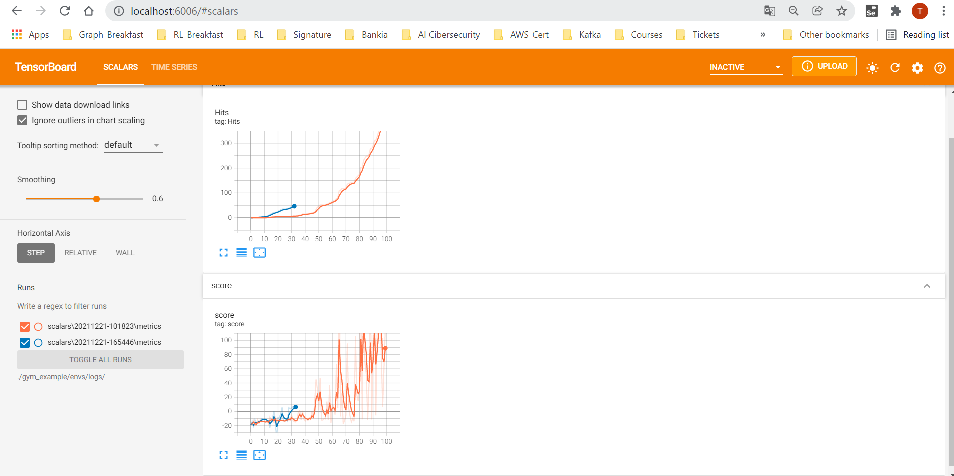         
 
 
 
Recuerda que el Score es la reward. Juega con la barra de **Smoothing** para aplanar la curva y ver si el entrenamiento tiene una tendencia definida o no. No olvides **adjuntar las gráficas de tu entrenamiento en el notebook, con la curva aplanada y sin aplanar**     

* En el propio notebook, antes de ejecutar la celda de entrenamiento, ejecuta la celda inferior. Tras comecnzar el entrenamiento, selecciona *SCALARS* en el desplegable y actualiza con el icono de *actualizar* en la zona superior derecha.    


In [2]:
#Load the TensorBoard notebook extension  
%reload_ext tensorboard

%tensorboard --port="6009" --logdir ./logs/  # O tu ruta donde se guarden los logs. Una vez aparecido Tensorboard, pincha en SCALARS.

# Si ejecutas esta celda varias veces y te dice que el puerto está en uso, añade: --port="6008" en la linea anterior para cambiar el puerto

episode: 0/100, score: -21.399999999999974, hits: 0
episode: 1/100, score: -15.599999999999994, hits: 0
episode: 2/100, score: -31.39999999999992, hits: 2
episode: 3/100, score: -9.600000000000001, hits: 2
episode: 4/100, score: -10.000000000000002, hits: 2
episode: 5/100, score: -7.800000000000001, hits: 2
episode: 6/100, score: -9.200000000000001, hits: 2
episode: 7/100, score: -14.0, hits: 2
episode: 8/100, score: -5.2, hits: 2
episode: 9/100, score: -9.400000000000002, hits: 2
episode: 10/100, score: -5.2, hits: 2
episode: 11/100, score: -11.200000000000003, hits: 2
episode: 12/100, score: -8.600000000000001, hits: 2
episode: 13/100, score: -11.000000000000004, hits: 2
episode: 14/100, score: -9.200000000000005, hits: 3
episode: 15/100, score: -5.2, hits: 3
episode: 16/100, score: -0.20000000000000373, hits: 5
episode: 17/100, score: -12.000000000000004, hits: 5
episode: 18/100, score: -5.2, hits: 5
episode: 19/100, score: -5.2, hits: 5
episode: 23/100, score: -15.999999999999986, 

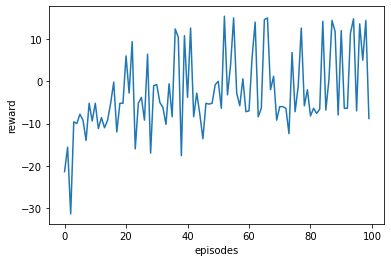

In [3]:
#from paddle import Paddle

import random
import numpy as np

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Esto es para evitar la verbosidad de Tensorflow 

from tensorflow.keras import Sequential
from collections import deque
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import tensorflow as tf


env = Paddle()
np.random.seed(27)


class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1
        self.gamma = .95
        self.batch_size = 64
        self.epsilon_min = .01
        self.epsilon_decay = .995
        self.learning_rate = 0.001
        self.memory = deque(maxlen=100000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(64, input_shape=(self.state_space,), activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def train_dqn(episode):

    loss = []

    action_space = 3
    state_space = 5
    max_steps = 1000

    agent = DQN(action_space, state_space)
    
    logdir = "./logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S") # Aqui se tomala ruta relativa desde donde se encuentra el notebook
    writer = tf.summary.create_file_writer(logdir + "/metrics") 
    with writer.as_default():    
    
        for e in range(episode):
            state = env.reset()
            state = np.reshape(state, (1, state_space))
            score = 0
            for i in range(max_steps):
                action = agent.act(state)
                reward, next_state, done, hits = env.step(action)
                score += reward
                next_state = np.reshape(next_state, (1, state_space))
                agent.remember(state, action, reward, next_state, done)
                state = next_state
                agent.replay()
                if done:
                    print("episode: {}/{}, score: {}, hits: {}".format(e, episode, score, hits))
                    break
            loss.append(score)
            
            tf.summary.scalar("score", score, step=e)
            tf.summary.scalar("Hits", hits, step=e)
            
    return loss


ep = 100
loss = train_dqn(ep)
plt.plot([i for i in range(ep)], loss)
plt.xlabel('episodes')
plt.ylabel('reward')
plt.show()

**Tarea 2: Diseña tu propio entorno**    
Para esto tenemos diferentes opciones, elige según tus posibilidades o quieras aprender más o menos.
1. Usa este mismo entorno que hemos creado y cambia los colores de la pala, la pelota y le tamaño de la ventana principal o background.        

2. En este [enlace](github.com/shivaverma/Orbit) tienes más ideas de entornos gráficos, modifícalos a tu antojo (en este caso, explica que modificaciones has hecho) o crea uno nuevo basándote en ellos, en este [enlace](https://docs.python.org/3/library/turtle.html) puedes consultar la documentación de la librería *Turtle*.         

3. Inventa tu un caso real, si decides esta opción te recomiendo que tu entorno tenga una estructura similar a [esta](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py) para no tener problemas con la resolucion si lo haces con RL-keras (puedes usar cualquier algoritmo de la librería o incluso comparar varios. Para que la comparación sea válida, no cambies ningún hiperparámetro o parámetro, a parte del agente). Siéntete libre de usar cualquier Framework de RL o una implementación que consideres adecuada (puedes reutilizar otras de clase). Puedes echar un vistazo a los papers que están colgados en la carpeta de la sesión 6, concretamente en el de "Deep Reinforcement Learning for Imbalanced Classification" tienes subrayado los aspectos más importantes que definen el entorno y las recompensas.

**Tarea 2.1:**  He realizado modificaciones tanto en el color de fondo, color de la pelota, background, así como ir jugando con las recompensas. También con motivo de aclerar más el juego y la velocidad de la bola he modificado **self.ball.dx = 3 #ball's x-axis velocity ** y **self.ball.dy = -3 #ball's y-axis velocity**, pero al subirlo no se detectaba que impactaba con la pala y se contabilizaban todas como perdidas, por lo que lo he dejado como estaba. Todas las modifcaciones las he dejado en la parte de arriba del código de Paddle.

![Segundo entrenamiento](./images/juego_6.jpg?raw=true "Optional Title")
![Segundo entrenamiento](./images/juego_6_grafica.jpg?raw=true "Optional Title")

**Tarea 2.2:**       

Basandome en el juego Jump, he generado el entorno Bota, en el que se han hecho modificaciones en los rewards, en el marcador en el que se anotan el total de obstaculos esquivados en todas las partidas, así como la imagen del protagonista del juego que ahora es una llama. También se ha modificado la imagen de los obstaculos por hachas lanzadas.

In [5]:
import random
import turtle

class Bota:

    def __init__(self):

        self.llama = 'assets/llama_2.gif'
        self.axe = 'assets/axe.gif'
        
        self.screen_width = 900
        self.screen_length = 400
        self.done = False

        self.scorecount = 0
        self.reward = 0
        self.triggered = False
        self.count = 20
        self.direction = 1
        self.speed = 5
        self.up_down_count = 20
        self.t_rex_speed = 5
        self.obs_size = 4
        self.counter = 100

        self.start = -180
        self.end = -90
        self.diff = (self.end - self.start) / (self.obs_size - 1)

        self.color = ['orange', 'red', 'gray', 'green', 'yellow', 'blue', 'purple', 'magenta']
        # self.color = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
        self.obs_height = [self.start + self.diff * i for i in range(self.obs_size)]
        self.obs = [turtle.Turtle() for i in range((self.obs_size * 3) // 2)]

        self.resetObs()

        self.done = 0
        self.reward = 0

        # Set up Background
        self.win = turtle.Screen()
        self.win.addshape(self.llama)
        self.win.addshape(self.axe)
        self.win.title('Bota con la Llama')
        self.win.bgcolor('black')
        self.win.setup(width=self.screen_width, height=self.screen_length)
        self.win.tracer(0)

        # T rex config
        self.t_rex = turtle.Turtle()
        self.inializeTrext()

        # Obstacle config
        self.obstacle_speed = -3
        
        # -------------------- Keyboard control ----------------------

#         self.win.listen()
#         self.win.onkey(self.triggerjump, 'space')

        self.score = turtle.Turtle()
        self.score.speed(0)
        self.score.color('white')
        self.score.penup()
        self.score.hideturtle()
        self.score.goto(0, 160)
        self.score.write("Total Dodged : {}".format(self.scorecount), align='center', font=('Courier', 24, 'bold'))

    def inializeTrext(self):

        self.t_rex.shape(self.llama)  # Select a square shape

        self.t_rex.speed(0)
        self.t_rex.shapesize(stretch_wid=1.6, stretch_len=1.6)  # Establecemos longitud
        self.t_rex.penup()
        self.t_rex.color('white')  # Set the color to white
        self.t_rex.setx(-350)
        self.t_rex.sety(-175)

    def resetObs(self):
        for i in self.obs:
            i.flag = False
            i.passed = False
            i.speed(0)
#             i.shapesize(stretch_wid=1.6, stretch_len=1.6)
#             i.shape(self.axe) 
            i.shape('circle')  # Forma de circulo
            i.color(random.choice(self.color))
            i.penup()
            i.goto(self.screen_width / 2, 0)

    def resetTrex(self):

        self.triggered = False
        self.count = self.up_down_count
        self.direction = 1
        self.t_rex.goto(-350, -175)


    def triggerjump(self):

        self.triggered = True

    def resetScore(self):

#         self.scorecount = 0
        self.updateScore()

    def updateScore(self):

        self.score.clear()
        self.score.write("Total Dodged : {}".format(self.scorecount), align='center',
                         font=('Courier', 24, 'bold '))

    def resetOb(self, obs):

        obs.flag = False
        obs.passed = False
        obs.setx(self.screen_width / 2)

    def jump(self):

        if self.triggered:
            tex_y = self.t_rex.ycor()
            if self.count > 0:
                self.t_rex.sety(tex_y + self.direction * self.t_rex_speed)
                self.count -= 1
            elif self.count == 0 and self.direction == 1:
                self.count = self.up_down_count
                self.direction = -1
            elif self.count == 0 and self.direction == -1:
                self.triggered = False
                self.count = self.up_down_count
                self.direction = 1

    def move_previous_obstacles(self):
        
        for i in self.obs:

            if i.flag:

                if i.xcor() + self.obstacle_speed < -1 * self.screen_width / 2:
                    self.resetOb(i)

                else:
                    if abs(self.t_rex.xcor() - i.xcor()) <= 17 and abs(self.t_rex.ycor() - i.ycor()) <= 25:
                        self.done = True
                        self.reset()
                    elif not i.passed and self.t_rex.xcor() > i.xcor():
                        self.scorecount += 1
                        i.passed = True
                        i.setx(i.xcor() + self.obstacle_speed)
                        self.reward += 7
                        self.updateScore()
                    else:
                        i.setx(i.xcor() + self.obstacle_speed)

    def run_frame(self):

        self.win.update()
        self.move_previous_obstacles()
        if self.counter % 60 == 0:
            r1 = random.randint(0, 4)
            if r1 != 0:
                for i in self.obs:
                    if not i.flag:
                        i.flag = True
                        i.sety(random.choice(self.obs_height))
                        break
                self.counter = 1

        else:
            self.counter += 1

        self.jump()

    # ------------------------ AI control ------------------------

    # 0 no hace nada
    # 1 Salta

    def reset(self):
        self.resetObs()
        self.resetTrex()
        self.resetScore()
        state = [i.xcor()*.01 for i in self.obs] + [i.ycor()*.01 for i in self.obs] + [self.t_rex.ycor()*.01]
        return state

    def step(self, action):

        self.reward = 0
        self.done = 0

        if action == 1: # Salta
            self.reward -= 1
            self.triggerjump()

        self.run_frame() 
        self.reward += .1 # Por step dado en el juego

        #Reconpensa por finalización del juego.
        if self.done:
            self.reward -= 20

        state = [i.xcor()*.01 for i in self.obs] + [i.ycor()*.01 for i in self.obs] + [self.t_rex.ycor()*.01]
        return self.reward, state, self.done,self.scorecount


# ------------------------ Human control ------------------------

# env = Jump()
# while 1:
#     env.run_frame()

In [2]:
import random
import numpy as np

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Esto es para evitar la verbosidad de Tensorflow 

from tensorflow.keras import Sequential
from collections import deque
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import tensorflow as tf


class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1
        self.gamma = .95
        self.batch_size = 64
        self.epsilon_min = .01
        self.epsilon_decay = .995
        self.learning_rate = 0.001
        self.memory = deque(maxlen=100000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(64, input_shape=(self.state_space,), activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

episode: 0/100, score: -85.09999999999974, dodgeds: 0
episode: 1/100, score: -22.40000000000006, dodgeds: 0
episode: 2/100, score: 17.300000000000168, dodgeds: 1
episode: 3/100, score: 8.10000000000014, dodgeds: 1
episode: 4/100, score: 7.10000000000014, dodgeds: 1
episode: 5/100, score: 9.100000000000158, dodgeds: 1
episode: 6/100, score: 10.000000000000156, dodgeds: 1
episode: 7/100, score: 8.000000000000128, dodgeds: 1
episode: 8/100, score: 16.00000000000022, dodgeds: 2
episode: 9/100, score: 9.100000000000147, dodgeds: 2
episode: 10/100, score: 8.000000000000156, dodgeds: 2
episode: 11/100, score: 20.40000000000031, dodgeds: 4
episode: 12/100, score: 18.800000000000196, dodgeds: 6
episode: 13/100, score: 21.100000000000207, dodgeds: 7
episode: 14/100, score: 32.30000000000029, dodgeds: 9
episode: 15/100, score: 10.100000000000158, dodgeds: 9
episode: 16/100, score: 7.300000000000118, dodgeds: 9
episode: 17/100, score: 27.20000000000031, dodgeds: 11
episode: 18/100, score: 6.500000

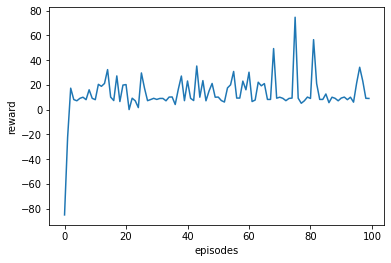

In [21]:
env = Bota()
np.random.seed(27)

def train_dqn(episode):

    loss = []

    action_space = 2 # 1 Salta 0 no hagas nada
    state_space = 13 # Posición Y de la Llama y posiciones X Y de los obstaculos.
    max_steps = 1000

    agent = DQN(action_space, state_space)
    
    logdir = "./logs/scalars_bota/" + datetime.now().strftime("%Y%m%d-%H%M%S") # Aqui se tomala ruta relativa desde donde se encuentra el notebook
    writer = tf.summary.create_file_writer(logdir + "/metrics") 
    with writer.as_default():    
    
        for e in range(episode):
            state = env.reset()
            state = np.reshape(state, (1, state_space))
            score = 0
            for i in range(max_steps):
                action = agent.act(state)
                reward, next_state, done, dodged = env.step(action)
                score += reward
                next_state = np.reshape(next_state, (1, state_space))
                agent.remember(state, action, reward, next_state, done)
                state = next_state
                agent.replay()
                if done:
                    print("episode: {}/{}, score: {}, dodgeds: {}".format(e, episode, score, dodged))
                    break
            loss.append(score)
            
            tf.summary.scalar("score", score, step=e)
            tf.summary.scalar("dodged", dodged , step=e)
            
    return loss


ep = 100
loss = train_dqn(ep)
plt.plot([i for i in range(ep)], loss)
plt.xlabel('episodes')
plt.ylabel('reward')
plt.show()

![Salta Llama](./images/juego_2_bota.jpg?raw=true "Optional Title")

**Tarea 3: Resuelve tu propio entorno**       

Adjunta la gráfica que tu elijas en la que se vea como ha evolucionado el entrenamiento. Si no converge, no te preocupes, **simplemente explica razonadamente lo que creas que pueda estar sucediendo**


**Respuesta:**
**He entrenado con distintas recompensas a la hora de salvar los obstaculos, 5 en el primer entreno**
![Primer entrenamiento](./images/juego_1_bota_grafica.jpg?raw=true "Optional Title")
**y 7 en el segundo**

![Segundo entrenamiento](./images/juego_2_bota_grafica.jpg?raw=true "Optional Title")

**y el resto se ha quedado igual, 0.1 por paso dado, -1 por cada salto.** He incrementado la recompensa por salvar obstaculos en el segundo, para incentivar que el juego pudiera evaluar que no hay tanta perdida por saltar, ya que observaba que en la primera iteración se quedaba bastante quieto, entendiendo por que consideraba bastante importante la penalización por saltar. 
En estas gráficas se observa que toma los valores positivos rapidamanente pero luego la tendencia es estabilizar y se queda un poco plana, ya en valores positivos.

**Tarea 4:OPCIONAL**    
(Si has optado por el punto 3 de la tarea dos, ya has resuelto esto, así que olvidalo!)      
Integra el entorno que has creado con Turtle dentro de la libreria GYM, el agente no, **sólo el entorno**.

In [1]:
%pwd

'C:\\Users\\JPAS\\Cursos\\MIOTI_Master_en_Data_Sciencie\\Advance\\RL\\SESION_5_Multi_Armed_Bandits_Rewards\\challenge'

In [2]:
%cd gym-bota

C:\Users\JPAS\Cursos\MIOTI_Master_en_Data_Sciencie\Advance\RL\SESION_5_Multi_Armed_Bandits_Rewards\challenge\gym-bota


In [29]:
!pip install -e .

Obtaining file:///C:/Users/JPAS/Cursos/MIOTI_Master_en_Data_Sciencie/Advance/RL/SESION_5_Multi_Armed_Bandits_Rewards/challenge/gym-bota
  Attempting uninstall: gym-bota
    Found existing installation: gym-bota 0.0.0
    Uninstalling gym-bota-0.0.0:
      Successfully uninstalled gym-bota-0.0.0
  Running setup.py develop for gym-bota


In [30]:
import gym
import numpy as np
import random
import gym_bota

In [31]:
env = gym.make("gym_bota:bota-v0") 

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

print(q_table)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]



![Estructura proyecto gym bota](./images/gym_bota.jpg?raw=true "Optional Title")

## Extra ##
Aquí te dejo un [enlace](https://www.tensorflow.org/tensorboard/get_started?hl=es-419) de la documentación oficial de Tensorboard y este [otro blog](https://ichi.pro/es/profundizacion-en-tensorboard-tutorial-con-ejemplos-215705257524566) en castellano en el que viene una explicación básica y a la vez completa. Ambos enlaces explican como implemetarlo como *Callbacks* de Keras